In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [16]:
data = pd.read_csv('hw5_treasury yield curve data.csv')
data.columns = ['Date','SVENF01','SVENF02','SVENF03','SVENF04','SVENF05','SVENF06','SVENF07','SVENF08',
                'SVENF09','SVENF10','SVENF11','SVENF12','SVENF13','SVENF14','SVENF15','SVENF16',
                'SVENF17','SVENF18','SVENF19','SVENF20','SVENF21','SVENF22','SVENF23','SVENF24',
                'SVENF25','SVENF26','SVENF27','SVENF28','SVENF29','SVENF30','Adj_Close']
data.drop('Date', axis=1, inplace=True)
data.head()

,SVENF01,SVENF02,SVENF03,SVENF04,SVENF05,SVENF06,SVENF07,SVENF08,SVENF09,SVENF10,...,SVENF22,SVENF23,SVENF24,SVENF25,SVENF26,SVENF27,SVENF28,SVENF29,SVENF30,Adj_Close
0,2.1224,2.0266,2.1023,2.2377,2.3790,2.5042,2.6069,2.6885,2.7530,2.8054,...,3.3355,3.3876,3.4400,3.4925,3.5446,3.5962,3.6471,3.6970,3.7458,10.130177
1,2.1239,2.0317,2.1096,2.2468,2.3901,2.5171,2.6217,2.7049,2.7710,2.8247,...,3.3574,3.4091,3.4610,3.5130,3.5646,3.6156,3.6660,3.7153,3.7636,10.130177
2,2.0874,1.9956,2.0844,2.2289,2.3736,2.4980,2.5984,2.6779,2.7418,2.7951,...,3.3589,3.4086,3.4575,3.5055,3.5524,3.5980,3.6421,3.6847,3.7257,10.150118
3,2.1319,2.0559,2.1451,2.2856,2.4257,2.5461,2.6428,2.7188,2.7791,2.8289,...,3.3940,3.4485,3.5029,3.5568,3.6099,3.6622,3.7132,3.7630,3.8113,10.130177
4,2.1051,2.0234,2.1180,2.2632,2.4051,2.5248,2.6198,2.6940,2.7532,2.8029,...,3.3712,3.4227,3.4735,3.5234,3.5722,3.6196,3.6655,3.7098,3.7525,10.130177


D:\Anaconda\Installation\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


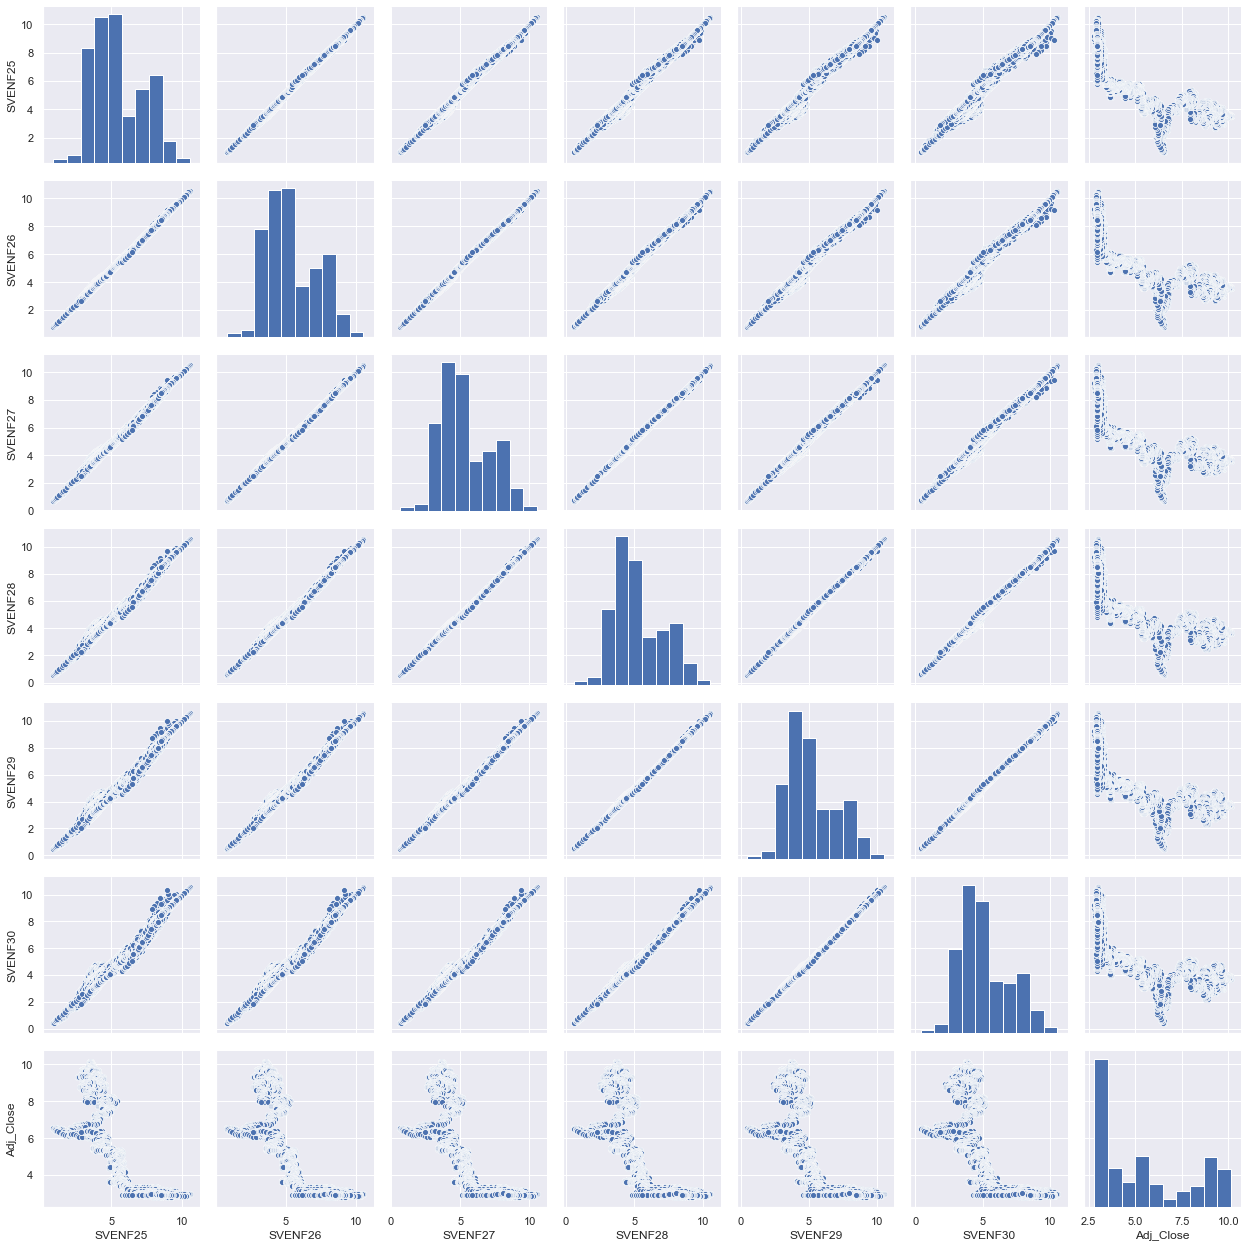

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
data.dropna(inplace=True)
cols = ['SVENF25','SVENF26','SVENF27','SVENF28','SVENF29','SVENF30','Adj_Close']
sns.pairplot(data[cols], size=2.5)
plt.tight_layout()
plt.show()

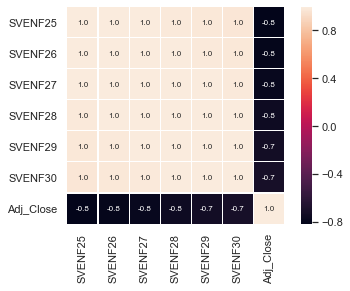

In [18]:
import numpy as np
cm = np.corrcoef(data[['SVENF25','SVENF26','SVENF27','SVENF28','SVENF29','SVENF30','Adj_Close']].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm,linewidths = 0.1,cbar=True,annot=True,square=True,fmt='.1f',annot_kws={'size': 8},
                 yticklabels=['SVENF25','SVENF26','SVENF27','SVENF28','SVENF29','SVENF30','Adj_Close'],
                 xticklabels=['SVENF25','SVENF26','SVENF27','SVENF28','SVENF29','SVENF30','Adj_Close'])

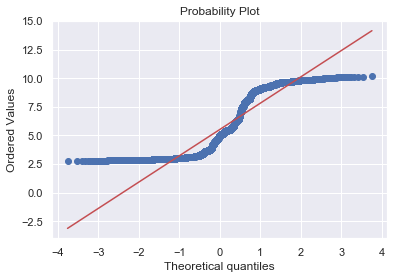

In [19]:
import scipy.stats as stats
import pylab
stats.probplot(data.Adj_Close,dist="norm",plot=pylab)
pylab.show()

In [20]:
## Standardize
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
X = data[data.columns[:-1]].values
y = data['Adj_Close'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=42)
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)
mms = MinMaxScaler()
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
y_train = mms.fit_transform(y_train)
y_test = mms.transform(y_test)

## Without PCA(Linear and SVM)

In [21]:
##Linear 
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
slr = LinearRegression()
slr.fit(X_train,y_train)
y_pred = slr.predict(X_test)

train_R2_score = slr.score(X_train, y_train)
train_RMSE = np.sqrt(mean_squared_error(y_train,slr.predict(X_train)))
test_R2_score = slr.score(X_test, y_test)
test_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print('The coefficient is : ', slr.coef_)
print('The intercept is:  ', slr.intercept_)
print('The R2 training is: ', train_R2_score)
print(' The RMSE of the training data is : ', train_RMSE)
print('R2 testing is: ', test_R2_score)
print('RMSE testing is: ', test_RMSE)



The coefficient is :  [[  -1.74209314   18.05601776  -79.50362437  178.28689279 -199.58179055
    64.47665974   80.18558906  -82.65661605  -11.96186441   85.67966428
   -76.32217112   52.50255604   -0.23207591  -22.41199213  -24.70499289
    -1.90320888  -76.1229696    54.10702262   34.00038232   33.014706
   138.49961127  -95.08318818   43.1476239  -102.49449768 -195.04972914
    58.72040574   25.36791629  208.50203185  -20.1023629   -84.92582726]]
The intercept is:   [0.36699988]
The R2 training is:  0.9022730353400444
 The RMSE of the training data is :  0.10568051677260075
R2 testing is:  0.9041309535337716
RMSE testing is:  0.10645834077267638


In [22]:
## SVR
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
svr.fit(X_train,y_train)
y_pred = svr.predict(X_test)

train_R2_score = svr.score(X_train, y_train)
train_RMSE = np.sqrt(mean_squared_error(y_train,svr.predict(X_train)))
test_R2_score = svr.score(X_test, y_test)
test_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

print('The intercept is:  ', svr.intercept_)
print('The R2 training is: ', train_R2_score)
print(' The RMSE of the training data is : ', train_RMSE)
print('R2 testing is: ', test_R2_score)
print('RMSE testing is: ', test_RMSE)

D:\Anaconda\Installation\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The intercept is:   [0.46107123]
The R2 training is:  0.9801625228846407
 The RMSE of the training data is :  0.04761359161360448
R2 testing is:  0.9815563011489163
RMSE testing is:  0.04669436786503233


## PCA(Linear and SVM)

In [23]:
from sklearn.decomposition import PCA
X = data[data.columns[:-1]].values
y = data['Adj_Close'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=42)
sc = StandardScaler()

y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)
mms = MinMaxScaler()
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)
y_train = mms.fit_transform(y_train)
y_test = mms.transform(y_test)

pca=PCA(n_components=3)
X_train=pca.fit_transform(X_train_std)
X_test=pca.fit_transform(X_test_std)


print('Explained variance ratio: ', pca.explained_variance_ratio_)

Explained variance ratio:  [0.93067768 0.0418521  0.02150743]


In [24]:
## Linear
slr = LinearRegression()
slr.fit(X_train,y_train)
y_pred = slr.predict(X_test)

train_R2_score = slr.score(X_train, y_train)
train_RMSE = np.sqrt(mean_squared_error(y_train,slr.predict(X_train)))
test_R2_score = slr.score(X_test, y_test)
test_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print('The coefficient is : ', slr.coef_)
print('The intercept is:  ', slr.intercept_)
print('The R2 training is: ', train_R2_score)
print(' The RMSE of the training data is : ', train_RMSE)
print('R2 testing is: ', test_R2_score)
print('RMSE testing is: ', test_RMSE)

The coefficient is :  [[-0.05764596 -0.06619403  0.03614012]]
The intercept is:   [0.36699988]
The R2 training is:  0.8672181160186357
 The RMSE of the training data is :  0.12318480388760004
R2 testing is:  0.8636574057368397
RMSE testing is:  0.12695688727255697


In [25]:
## SVR
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
svr.fit(X_train,y_train)
y_pred = svr.predict(X_test)

train_R2_score = svr.score(X_train, y_train)
train_RMSE = np.sqrt(mean_squared_error(y_train,svr.predict(X_train)))
test_R2_score = svr.score(X_test, y_test)
test_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

print('The intercept is:  ', svr.intercept_)
print('The R2 training is: ', train_R2_score)
print(' The RMSE of the training data is : ', train_RMSE)
print('R2 testing is: ', test_R2_score)
print('RMSE testing is: ', test_RMSE)

D:\Anaconda\Installation\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Installation\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


The intercept is:   [0.34380457]
The R2 training is:  0.9608760886806383
 The RMSE of the training data is :  0.06686654075564342
R2 testing is:  0.9597537906606797
RMSE testing is:  0.06897679008763334


In [26]:
print("My name is {Wanrong Cai}")
print("My NetID is: {wanrong2}")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is {Wanrong Cai}
My NetID is: {wanrong2}
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
